## Урок 7 (задания 2, 3 и 4)

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [1]:
import numpy as np

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
zp

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [3]:
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [4]:
B1 = 0.1

In [5]:
n = len(zp)

In [6]:
def mse_(B1,ks=ks,zp=zp,n=10):
    return np.sum((B1*zp-ks)**2)/n

In [7]:
alpha = 1e-6
alpha

1e-06

In [8]:
for i in range(3000):
    B1 -= alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    if i%500 == 0:
        print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration: 0, B1=0.25952808, mse=493237.7212546963
Iteration: 500, B1=5.889815595583751, mse=56516.858416040064
Iteration: 1000, B1=5.8898204201285544, mse=56516.85841571941
Iteration: 1500, B1=5.889820420132673, mse=56516.85841571943
Iteration: 2000, B1=5.889820420132673, mse=56516.85841571943
Iteration: 2500, B1=5.889820420132673, mse=56516.85841571943


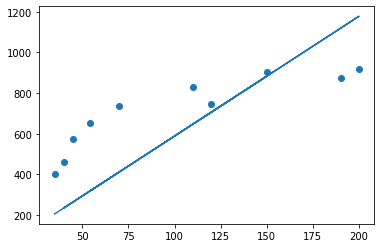

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zp,ks)
plt.plot(zp,B1*zp)
plt.show()

In [10]:
# Ответ: (угловой) коэффициент (парной) линейной регрессии B1 (без интерсепта) ~ 5.88982

#### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Ответ:

Если известны дисперсии сравнивамемых генеральных совокупностей, то при проверке статистических гипотез используют 
табличное значение функции Лапласа. Если дисперсии генеральных совокупностей неизвестны, то используют табличное значение точек 
распределения Стьюдента.
Источники: https://studfile.net/preview/4332699/page:26/
           http://www.rstu.ru/metods/books/vysktv4.pdf

#### *4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

##### Вариант 1: Вычисления на базе обучающией модели линейной регрессии

Slope: [2.62053888]
Intercept: 444.17735732435955
Root mean squared error:  6470.414201176658
R2 score:  0.7876386635293686


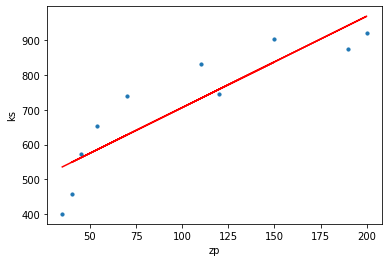

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# добавление 
zp = zp.reshape(-1, 1)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(zp, ks)
# Predict
ks_predicted = regression_model.predict(zp)

# model evaluation
rmse = mean_squared_error(ks, ks_predicted)
r2 = r2_score(ks, ks_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(zp, ks, s=10)
plt.xlabel('zp')
plt.ylabel('ks')

# predicted values
plt.plot(zp, ks_predicted, color='r')
plt.show()

##### Вариант 2: на базе источника: https://medium.com/meta-design-ideas/linear-regression-by-using-gradient-descent-algorithm-your-first-step-towards-machine-learning-a9b9c0ec41b1


In [12]:
#Gradient descent algorithm for linear regression

# minimize the "sum of squared errors". This is how we calculate and correct our error

def compute_error_for_line_given_points(a,b,points):

    totalError = 0 	#sum of square error formula

    for i in range (0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y-(b*x + a)) ** 2
    return totalError/ float(len(points))

def step_gradient(a_current, b_current, points, learning_rate):

    #gradient descent
    a_gradient = 0
    b_gradient = 0
    N = len(points)
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        a_gradient += -(2/N) * (y - (b_current * x + a_current))
        b_gradient += -(2/N) * x * (y - (b_current * x + a_current))
    
    new_a = a_current - (learning_rate * a_gradient)
    new_b = b_current - (learning_rate * b_gradient) 
    return [new_a,new_b]

def gradient_descent_runner(points, starting_a, starting_b, learning_rate, num_iteartions):

    a = starting_a
    b = starting_b
    for i in range(num_iteartions):
        a,b = step_gradient(a, b, points, learning_rate)
    return [a,b]

def run():
    #Step 1: Collect the data into one array
    points = np.column_stack([zp,ks])
    #Step 2: Define our Hyperparameters
    learning_rate = 0.001 #how fast the data converge
    #y=bx+a (Slope formule)
    initial_a = 200 # initial y-intercept guess
    initial_b = 1 # initial slope guess
    num_iterations = 1000
    
    print("Starting gradient descent at a = {0}, b = {1}, error = {2}".format(initial_a, initial_b, compute_error_for_line_given_points(initial_a, initial_b, points)))
    print("Running...")

    [a, b] = gradient_descent_runner(points, initial_a, initial_b, learning_rate, num_iterations)

    print("After {0} iterations a = {1}, b = {2}, error = {3}".format(num_iterations, a, b, compute_error_for_line_given_points(a, b, points)))

# main function
if __name__ == "__main__":
    run()

Starting gradient descent at a = 200, b = 1, error = 182520.1
Running...
After 1000 iterations a = nan, b = nan, error = nan


C:\Users\Larin-GV\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Larin-GV\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


Резюме по задаче 4: что-то у меня с форматом данных в массиве points не так, поэтому не получается.